### Parameters
* Simulations were v2.4, used a tau of 4, max pop size fold change of 3, 5e3 generations, no initial driver mutation, CGC driver gene lists, heterozygous mutations 1/10th the effect of homozygous

In [1]:
library(naturalsort)
library(rasterImage)
library(pracma)
library(viridis)
cols1 <- magma(520)

dataDir <- '~/jackgl/brain_1017/'
ctype <- 'Brain'

# Constant parameters for the simulations:
mu <- 0.05
sd <- 0.1
sp <- 0.005
N0 <- 1000

Loading required package: plotrix
Loading required package: viridisLite


In [2]:
flst <- naturalsort(list.files(dataDir))
flst <- flst[2:(length(flst))]

#### Load population size time series

In [3]:
Ns <- array(NA,dim=c(5e2,5e3))

for (ii in 1:5e2) {
load(paste0(dataDir,flst[ii]))
N[N==0] <- NA
Ns[ii,] <- N
}
dim(Ns)


[1]  500 5000

#### Calculate statistics over time

In [4]:
Ns_repmean <- apply(Ns,c(2),mean)
Ns_repmed <- apply(Ns,c(2),median)
Ns_repstd <- apply(Ns,c(2),std)

#### Get average number of heterozygous and homozygous driver and passenger mutations per cell

In [5]:
nd_het <- array(NA,dim=c(5e2,1))
np_het <- array(NA,dim=c(5e2,1))
nd_hom <- array(NA,dim=c(5e2,1))
np_hom <- array(NA,dim=c(5e2,1))

for (ii in 1:5e2) {
    load(paste0(dataDir,flst[ii]))
    nd_het[ii] <- sum(Pop$nd_het[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
    np_het[ii] <- sum(Pop$np_het[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
    nd_hom[ii] <- sum(Pop$nd_hom[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
    np_hom[ii] <- sum(Pop$np_hom[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
}


#### Plot smoothed population size time series for all simulations

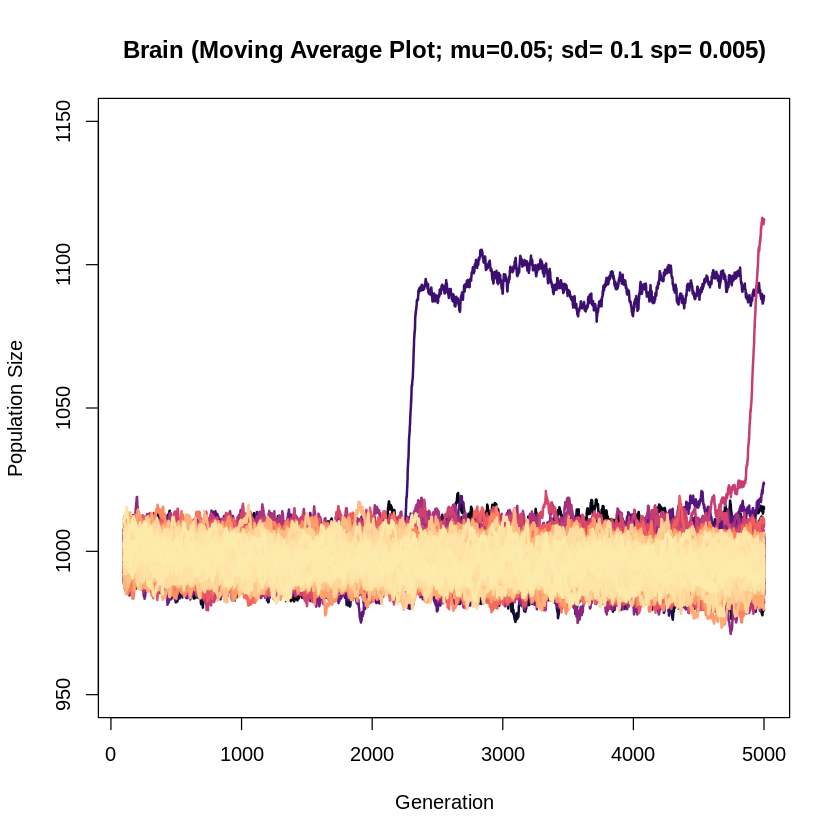

In [6]:
plot(100:length(Ns[1,]),tail(movavg(Ns[1,],100,'s'),4901),type='l',main=paste0(ctype,' (Moving Average Plot; mu=',toString(mu),';',' sd= ',toString(sd),' sp= ',toString(sp),')'),xlab='Generation',ylab='Population Size',col=cols1[1],lwd=2,ylim=c(950,1150))
for (i in 1:500) {lines(100:length(Ns[i,]),tail(movavg(Ns[i,],100,'s'),4901),type='l',col=cols1[i],lwd=2)}

#### Get population size fold changes

In [7]:
Ns_fc <- array(NA,dim=c(500,1))

for (ii in 1:5e2) {
    tmp <- movavg(Ns[ii,],100,'s')
    Ns_fc[ii] <- tmp[length(which(!is.na(tmp)))]/tmp[1]
}

rm(tmp)
Ns_fc_mean <- mean(Ns_fc)
Ns_fc_med <- median(Ns_fc)
Ns_fc_std <- std(Ns_fc)

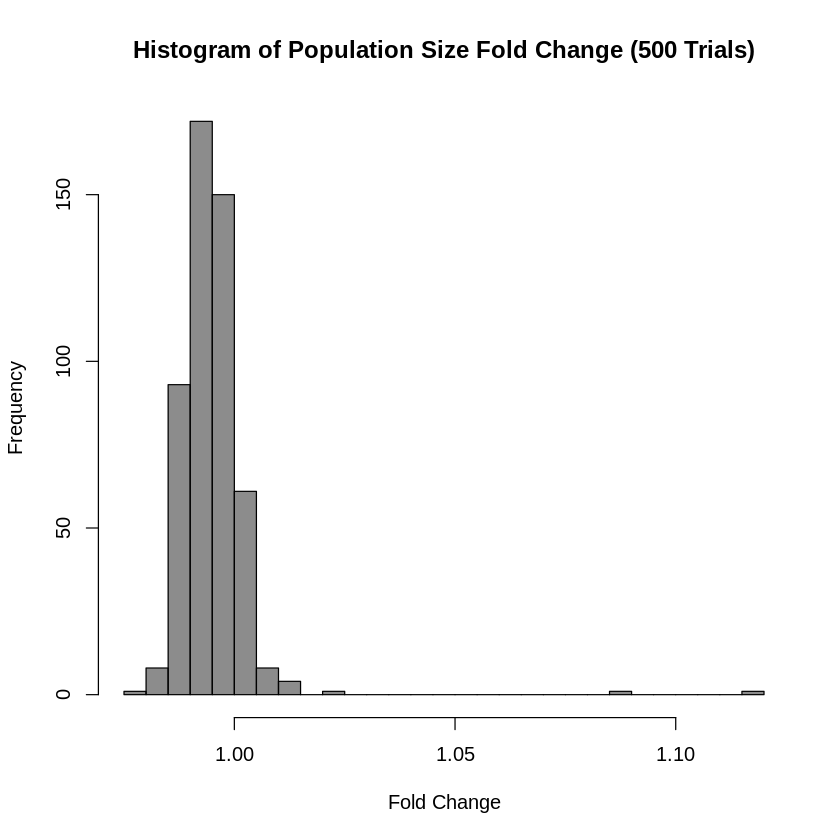

In [8]:
hist(Ns_fc,20,main='Histogram of Population Size Fold Change (500 Trials)',xlab='Fold Change',col=rgb(0.1,0.1,0.1,0.5))
options(repr.plot.width=10, repr.plot.height=7)

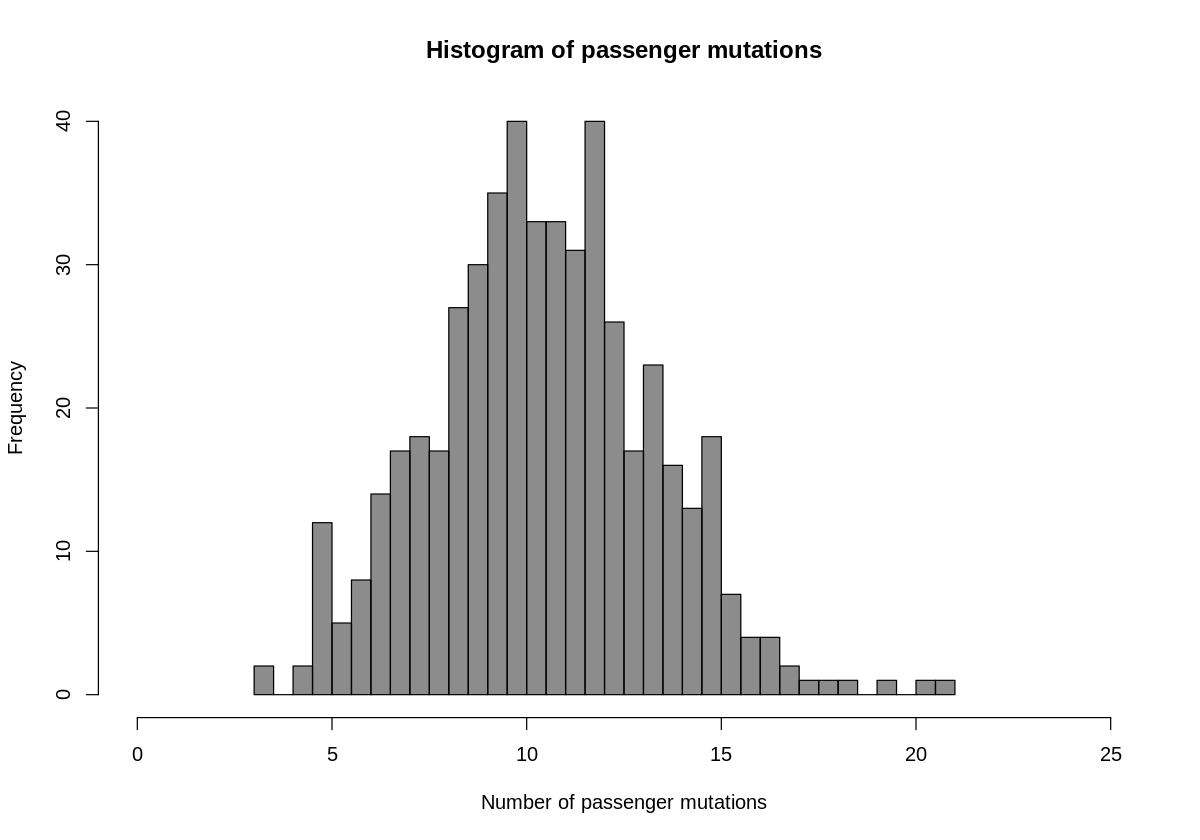

In [9]:
hist((np_het+(np_hom*2)),25,col=rgb(0.1,0.1,0.1,0.5),xlim=c(0,25),main='Histogram of passenger mutations',xlab='Number of passenger mutations')

#### Frequency of populations with at least one L1 heterzygous driver occurring

In [10]:
length(which((nd_het+(nd_hom*2))>=1))/500

[1] 0.048

#### Frequency of populations with at least one L1 homozygous driver occurring

In [11]:
length(which(nd_hom>=1))/500

[1] 0.004